
This repository contains the data preprocessing and model implementation for salary prediction in the IT sector, focusing on predicting salaries based on various influencing factors.

The project includes:

- **Data Preprocessing**: Cleaning and transforming the raw data for training machine learning models.
- **Model Implementation**: Multiple models are trained and validated to predict salary:
  - **Linear Regression**
  - **Polynomial Regression**
  - **GridSearch for Hyperparameter Tuning**
  - **Decision Tree**
  - **Random Forest**

The models are evaluated based on their performance, with hyperparameters optimized for better accuracy and prediction quality.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [ ]:

#load train_dataset, train_salaries, test_dataset
train_sal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data2/train_salaries.csv')
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data2/train_dataset.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data2/test_dataset.csv')

In [ ]:
test_df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...,...,...
999995,JOB1362686407682,COMP54,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,JOB1362686407683,COMP5,MANAGER,NONE,NONE,HEALTH,20,67
999997,JOB1362686407684,COMP61,JANITOR,NONE,NONE,OIL,1,91
999998,JOB1362686407685,COMP19,CTO,DOCTORAL,MATH,OIL,14,63


In [ ]:
train_df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5


In [ ]:
train_sal.head(2)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101


In [ ]:
train_df.head(2)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73


In [ ]:
# Adding salary data to train_dataset
train_df1 = train_df.merge(train_sal,on='jobId')

In [ ]:
train_df1.shape

(1000000, 9)

In [ ]:
# # Using pandas profile for basic EDA
# import pandas_profiling


# train_df1.profile_report()

# Basic EDA
### Identifying number of features or columns

In [ ]:
#all column name
train_df1.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values of train_dataset

train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


### Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
train_df1.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


### Get the total number of samples in the dataset using the len() function

In [ ]:
print('train data length: {}'.format(len(train_df1)))

train data length: 1000000


In [ ]:
# get how many unique values are in train_dataset

train_df1.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [ ]:
# Check for missing values in all the columnns of the train_dataset
train_df1.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [ ]:
# drop jobId and companyId from train_dataset

col = ['jobId','companyId']
train_df1.drop(col,inplace=True,axis=1)

train_df1.head(5)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [ ]:
# drop jobId and companyId from test_dataset

col = ['jobId','companyId']
test_df.drop(col,inplace=True,axis=1)
test_df.head(5)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [ ]:
# looping on whole dataset for geting list of categorical and numerical data column name and storing in respective list variable

categorical_col = [i for i in train_df1.columns if train_df1[i].dtype == 'object']
numerical_col = [i for i in train_df1.columns if train_df1[i].dtype != 'object']

print(f'All Categorical Columns :\n {categorical_col}\n')
print(f'All Numerical Columns :\n {numerical_col}\n')

All Categorical Columns :
 ['jobType', 'degree', 'major', 'industry']

All Numerical Columns :
 ['yearsExperience', 'milesFromMetropolis', 'salary']



# Correlation Matrix

In [ ]:
# # Correlation metrix using pandas
# train_df1.corr()


yearsExperience and salary are positively correlated.

yearsExperience and milesFromMetropolis have no correlation.

milesFromMetropolis and salary are weakly negatively correlated.

In [ ]:
# # Correlation metrix using seaborn

# sns.heatmap(train_df1.corr())
# plt.show()

# Chi-square Test

In [ ]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
# creating function for performing chi-sqaure test on two columns
def perform_chi_square_test(var_1,var_2):

    #Contingency Table
    contingency_table = pd.crosstab(train_df1[var_1],train_df1[var_2])

    #Observed Values
    observed_values = contingency_table.values

    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]

    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)

    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)

    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)

    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)

    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)
    print('p-value:',p_value)

    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on chi_square_statistic and critical_value
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on p_value and alpha
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")


In [ ]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for i in categorical_col:

    for j in categorical_col:

        if i == j:
            pass
        else:
            print('chi-square test on: %s %s'%(i,j))
            print()
            perform_chi_square_test(i,j)
            print('-----'*15,'\n')

chi-square test on: jobType degree

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  50117.72406771936
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
--------------------------------------------------------------------------- 

chi-square test on: jobType major

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16703.025256041707
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
--------------------------------------------------------------------------- 

chi-square test on: jobType industry

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  14.913329934821567
critical_value: 58.12403768086803
p-value: 0.9999643570205455
Retain H0,There is no relationship between 

# Scatter Plot

In [ ]:
# # create function for ploting scatterplot between two columns of dataset
# def scatr_plt(i,j):
#     plt.figure(figsize=(20,6))
#     plt.scatter(x=train_df1[i],y=train_df1[j])
#     plt.xlabel(i)
#     plt.ylabel(j)
#     plt.legend()
#     plt.show()


# #loop through numerical data list and use function to scatter plot between two columns
# for i in numerical_col:

#     for j in numerical_col:

#         if i == j:
#             pass
#         else:
#             scatr_plt(i,j)


# Histogram

In [ ]:
# for i in numerical_col:
#     plt.figure(figsize=(20,6))
#     plt.hist(train_df1[i])
#     plt.title(i)
#     plt.show()

# Groupby

In [ ]:
jobTypeGrouped = train_df1.groupby(by='jobType').count()
jobTypeGrouped

,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobType,,,,,,
CEO,124778,124778,124778,124778,124778,124778
CFO,124369,124369,124369,124369,124369,124369
CTO,125046,125046,125046,125046,125046,125046
JANITOR,124971,124971,124971,124971,124971,124971
JUNIOR,124594,124594,124594,124594,124594,124594
MANAGER,125121,125121,125121,125121,125121,125121
SENIOR,125886,125886,125886,125886,125886,125886
VICE_PRESIDENT,125235,125235,125235,125235,125235,125235


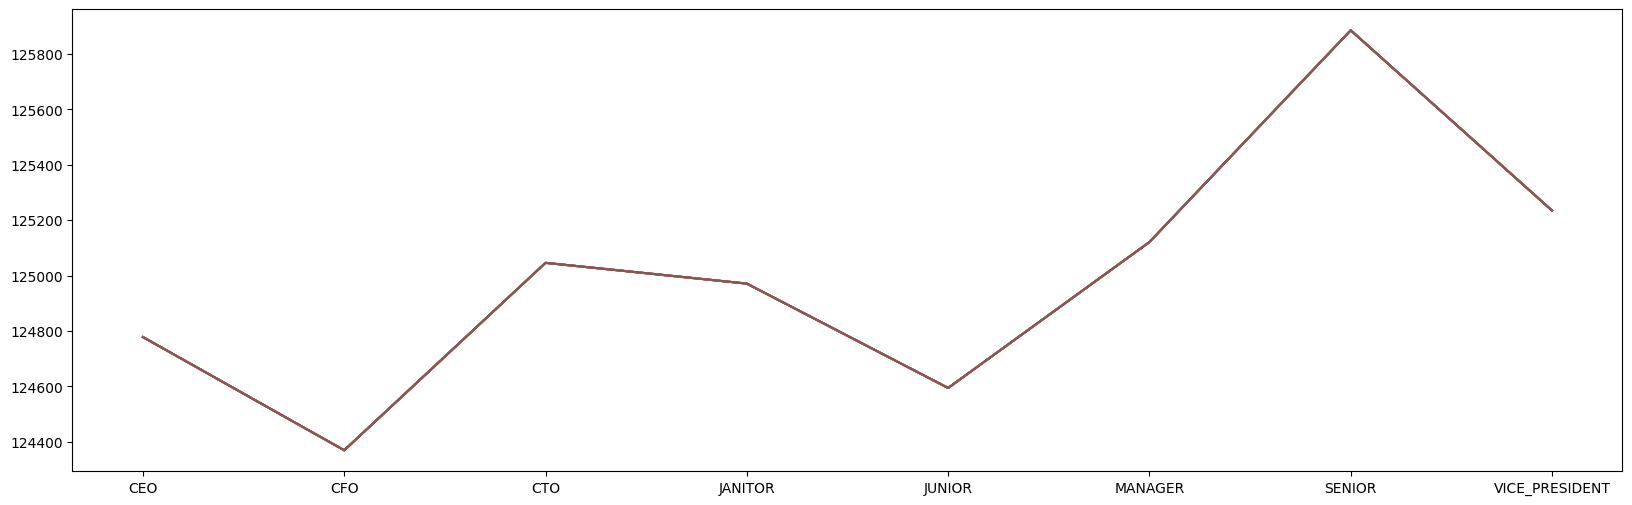

In [ ]:
# group data by jobType and plot count plot
plt.figure(figsize=(20,6))
plt.plot(jobTypeGrouped)
plt.show()

<Figure size 2000x600 with 0 Axes>

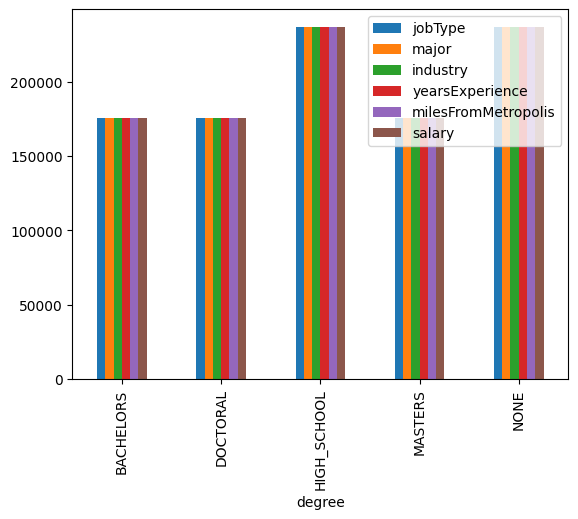

In [ ]:
# group data by degree and plot count plot
plt.figure(figsize=(20,6))
train_df1.groupby(by='degree').count().plot.bar()
plt.show()

<Figure size 2000x600 with 0 Axes>

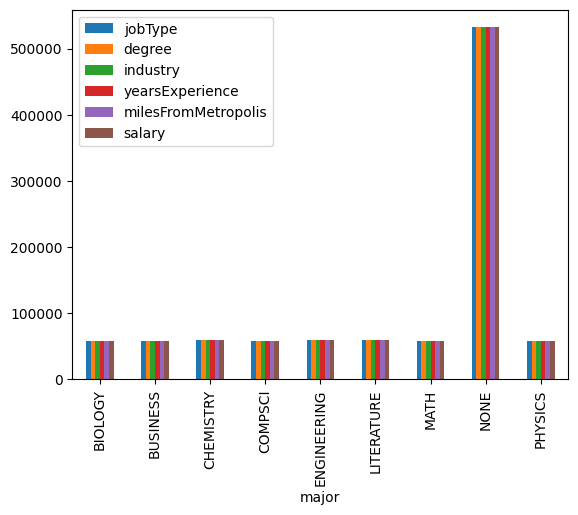

In [ ]:
# group data by major and plot count plot
plt.figure(figsize=(20,6))
train_df1.groupby(by='major').count().plot.bar()
plt.show()

<Figure size 2000x600 with 0 Axes>

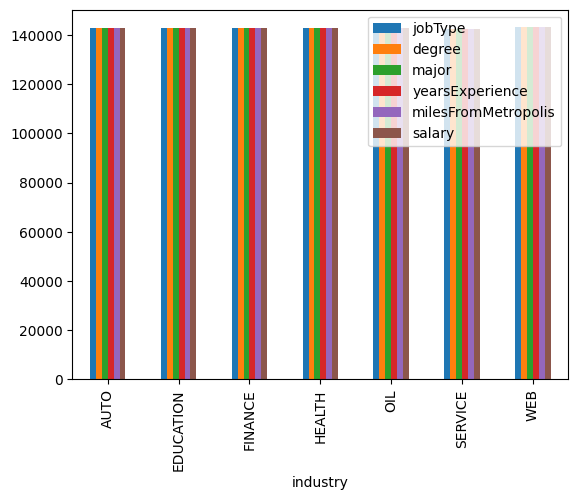

In [ ]:
# group data by industry and plot count plot
plt.figure(figsize=(20,6))
train_df1.groupby(by='industry').count().plot.bar()
plt.show()

<Figure size 2000x600 with 0 Axes>

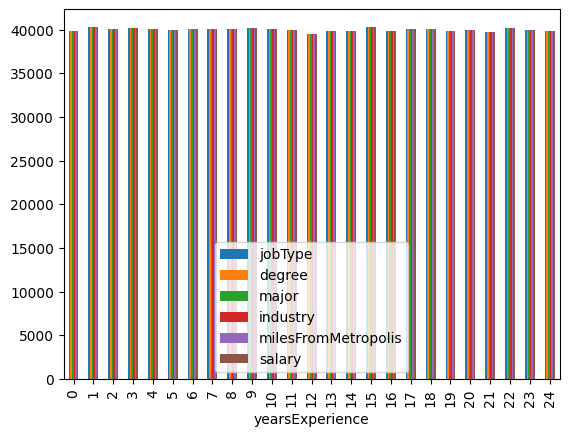

In [ ]:
# group data by yearsExperience and plot count plot
plt.figure(figsize=(20,6))
train_df1.groupby(by='yearsExperience').count().plot.bar()
plt.show()

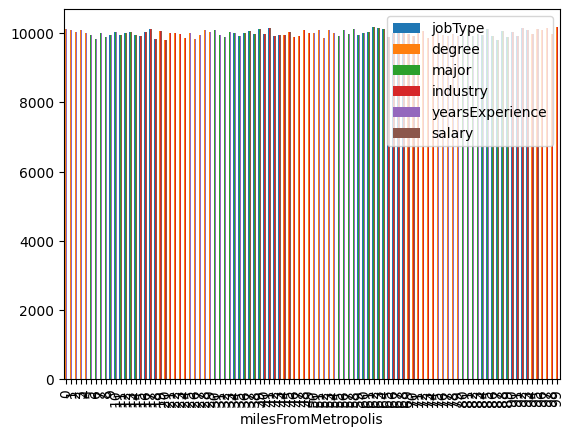

In [ ]:
# group data by milesFromMetropolis and plot count plot
train_df1.groupby(by='milesFromMetropolis').count().plot.bar()
plt.show()

KeyboardInterrupt: 

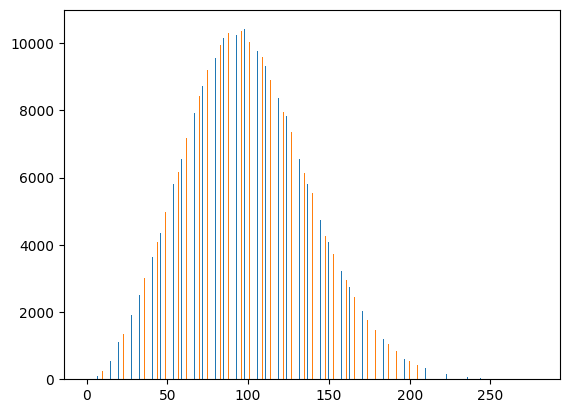

In [ ]:
# goup data by salary and plot count plot
train_df1.groupby(by='salary').count().plot.bar()

# Box Plot

In [ ]:
train_df1.columns

In [ ]:
# box plot for yearsExperience column
plt.figure(figsize=(20,6))
train_df1.boxplot('yearsExperience')
plt.show()

In [ ]:
# box plot for milesFromMetropolies column
plt.figure(figsize=(20,6))
train_df1.boxplot('milesFromMetropolis')
plt.show()

In [ ]:
# box plot for salary column
plt.figure(figsize=(20,6))
train_df1.boxplot('salary')
plt.show()

In [ ]:
# box plot using seaborn for "yearsExperience", "mileFromMetropolis", "salary"  column

col = ['yearsExperience','milesFromMetropolis','salary']
for i in col:
    plt.figure(figsize=(20,3))
    sns.boxplot(train_df1[i])
    plt.show()

# Violin Plot

In [ ]:
# violin plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='milesFromMetropolis', data=train_df1, palette='rainbow')
plt.show()

In [ ]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='salary', data=train_df1, palette='rainbow')
plt.show()

In [ ]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(y='salary', x='milesFromMetropolis', data=train_df1, palette='rainbow')
plt.show()

# Boxenplot

In [ ]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='salary', data=train_df1, palette='rainbow')
plt.show()

In [ ]:
# boxen plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='milesFromMetropolis', data=train_df1, palette='rainbow')
plt.show()

In [ ]:
# boxen plot for milesFromMetropolis from salary columns
plt.figure(figsize=(40,6))
sns.boxenplot(y='salary',x='milesFromMetropolis', data=train_df1, palette='rainbow')
plt.show()

# Point Plot

In [ ]:
# point plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,3))
sns.pointplot(x='yearsExperience',y='milesFromMetropolis', data=train_df1, palette='rainbow')
plt.show()

In [ ]:
# point plot for yearsExperience aminmax_scale salary columns
plt.figure(figsize=(20,3))
sns.pointplot(x='yearsExperience', y='salary', data=train_df1, palette='rainbow')
plt.show()

In [ ]:
# point plot for milesFromMetropolis from salary columns
plt.figure(figsize=(40,6))
sns.pointplot(y='salary',x='milesFromMetropolis', data=train_df1, palette='rainbow')
plt.show()

# Count Plot

In [ ]:
# count plot of whole datset based on yearsExperience

plt.figure(figsize=(20,3))
sns.countplot(train_df1['yearsExperience'],palette='rainbow')
plt.show()

In [ ]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(40,3))
sns.countplot(train_df1['milesFromMetropolis'],palette='rainbow')
plt.show()

In [ ]:
# count plot of whole datset based on salary
plt.figure(figsize=(80,6))
sns.countplot(train_df1['salary'],palette='rainbow')
plt.show()

# Swarm Plot
ploting data on 50000 of 1000000 sample for clear visualization


#### Subset of train dataset
Ploting process of swarm plot will take huge time because of large dataset <br>
So, we will take a subset of 5000 samples from train datset and plot it for interpretation

In [ ]:
# swarm plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience',y='milesFromMetropolis', data=train_df1[:5000], palette='rainbow')
plt.show()

In [ ]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience',y='salary', data=train_df1[:5000], palette='rainbow')
plt.show()

In [ ]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(25,6))
sns.swarmplot(x='milesFromMetropolis',y='salary', data=train_df1[:5000], palette='rainbow')
plt.show()

# Combine plot

You can increse size of training dataset data points from 5000 to 50000

In [ ]:
# combine boxen and swarm plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))

ax = sns.swarmplot(x='yearsExperience',y='milesFromMetropolis', data=train_df1[:5000], zorder=0) #zorder=0

sns.boxenplot(x='yearsExperience', y='milesFromMetropolis', data=train_df1[:5000],showfliers=False,ax=ax)

plt.show()

In [ ]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
ax = sns.swarmplot(x='yearsExperience',y='salary', data=train_df1[:5000], zorder=1) #zorder=1

sns.boxenplot(x='yearsExperience', y='salary', data=train_df1[:5000],ax=ax)
plt.show()

In [ ]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(30,6))
ax = sns.swarmplot(x='milesFromMetropolis',y='salary', data=train_df1[:5000],zorder=0.5) #zorder=0.5

sns.boxenplot(x='milesFromMetropolis', y='salary', data=train_df1[:5000],showfliers=False,ax=ax)
plt.show()

# Strip Plot

In [ ]:
# strip plot between milesFromMetropolis and  yearsExperience columns
plt.figure(figsize=(20,3))

sns.stripplot(x='yearsExperience', y='milesFromMetropolis', data=train_df1[:5000], palette='rainbow')

plt.show()

In [ ]:
# strip plot between yearsExperience , salary columns
plt.figure(figsize=(20,3))

sns.stripplot(x='yearsExperience', y='salary', data=train_df1[:5000], palette='rainbow')

plt.show()

In [ ]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(40,8))
sns.stripplot(x='milesFromMetropolis', y='salary', data=train_df1[:50000], palette='rainbow')
plt.show()

# Variance inflation factor (VIF)

In [ ]:
# looping on whole dataset for geting list of categorical and numerical data column name and storing in respective list variable

categorical_col = [i for i in train_df1.columns if train_df1[i].dtype == 'object']
numerical_col = [i for i in train_df1.columns if train_df1[i].dtype != 'object']

print(f'All Categorical Columns :\n {categorical_col}\n')
print(f'All Numerical Columns :\n {numerical_col}\n')

In [ ]:
# import statsmodle library for vif
import statsmodels.api as sm

In [ ]:
# creating a dataframe of just numerical values from train_dataset
inp_df = pd.DataFrame(train_df1[numerical_col],columns=numerical_col)
inp_df.head()

In [ ]:
inp_df.shape

In [ ]:
# target values from train_dataset
y = train_df1['salary']

# numerical values column names
num_col = [i for i in numerical_col if i != 'salary' ]
num_col

In [ ]:
# loop for calculating VIF for each feature
for i in range(0,len(num_col)):
    # taking one column as target variable
    y = inp_df['salary']
    # taking all other remaining columns as fetaure variable
    X = inp_df[num_col]
  # Instantiating the statsmodel
    model = sm.OLS(y,X)
  # fiting the OLS model on y and x
    result = model.fit()
  # geting the r^2 value of results.
    r_sqrd = result.rsquared
  # calculating vif value
    vif = round(1/(1-r_sqrd),2)

    print(f'R-Square value of "{num_col[i]}" columns is --> {round(r_sqrd,2)} || Keeping all other columns as features Variance inflation Factor of "{num_col[i]}" columns is --> {vif}')


# ANOVA Test

In [ ]:
from scipy import stats

In [ ]:
# function to perform anova test between two variables.
def perform_anova(x,y):
    # creating dataframe of two variables of interest
    train_anova = train_df1[[x,y]]
  # gouping the data in new dataframe
    group = train_anova.groupby(x).count().reset_index()
  # print grouped data
    print(group)

   # getting list of unique values from new dataframe for first variable
    unique_majors = train_anova[x].unique()
  # looping through each value present in list of unique values to plot probplot
    for major in unique_majors:
        stats.probplot(train_anova[train_anova[x] == major][y],dist='norm',plot=plt)
        plt.title("Probability Plot - " +  major)
        plt.show()

  # calculate ratio of the largest to the smallest sample standard deviation
    ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
    print(ratio)

  # Create ANOVA backbone table with empty string value, columns names -> 'Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'
    data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
    anova_table = pd.DataFrame(data,columns = ['Source of Variation','SS','df','MS','F','P-value','F crit'])
    anova_table.set_index('Source of Variation',inplace = True)
  # calculate SSTR and update anova table, with Source of variation = 'Between Groups'
    x_bar = train_anova[y].mean()
    SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
    anova_table['SS']['Between Groups'] = SSTR[y].sum()
  # calculate SSE and update anova table, with Source of variation = 'Within Groups'
    SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
    anova_table['SS']['Within Groups'] = SSE[y].sum()
  # calculate SSTR and update anova table, with Source of variation = 'Total'
    SSTR = SSTR[y].sum() + SSE[y].sum()
    anova_table['SS']['Total'] = SSTR

  # update degree of freedom, for each groups 'Between Groups', 'Within Groups', 'Total'
    anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
    anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
    anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
    anova_table['MS'] = anova_table['SS'] / anova_table['df']
  # calculate F
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F
  # p-value
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F,anova_table['df']['Between Groups'],
                                                               anova_table['df']['Within Groups'])
  # F critical

  # alpha value
    alpha = 0.05
  # possible hypothesis types "right-tailed, left-tailed, two-tailed" , choose one type and calculate F critcial and add to backbone dataframe
    tail_hypothesis_type = "two-tailed"
    if tail_hypothesis_type == "two-tailed":
        alpha /= 2
    anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'],
                                                          anova_table['df']['Within Groups'])
  # Final ANOVA Table
    print(anova_table)

  # The p-value approach
    print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['P-value']['Between Groups'] <= alpha:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'],
          " and p value is:",anova_table['P-value']['Between Groups'])
    print(conclusion)

  # The critical value approach
    print("\n--------------------------------------------------------------------------------------")
    print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
    print(conclusion)


In [ ]:
#using above function
# perform anova test on major and salary
perform_anova('major','salary')

In [ ]:
# perform anova test on jobType and salary
perform_anova('jobType','salary')

In [ ]:
# perform anova test on degree and salary
perform_anova('degree','salary')

In [ ]:
# perform anova test on industry and salary
perform_anova('industry','salary')

In [ ]:
# perform anova test on jobType and yearsExperience
perform_anova('jobType','yearsExperience')

In [ ]:
# perform anova test on degree and yearsExperience
perform_anova('degree','yearsExperience')

In [ ]:
# perform anova test on major and yearsExperience
perform_anova('major','yearsExperience')

In [ ]:
# perform anova test on industry and yearsExperiencea
perform_anova('industry','yearsExperience')

# Dendrogram

In [ ]:
import scipy
from scipy.cluster import hierarchy as hc

In [ ]:
X = train_df1[1:5000]
corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,6))

dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()

# Scaling
[correct-way-of-normalizing-and-scaling](https://stackoverflow.com/questions/63746182/correct-way-of-normalizing-and-scaling-the-mnist-dataset)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Helper function for scaling all numerical data using MinMaxScalar
def scaled(data,cols):
    data = data[cols]
    trans = MinMaxScaler()
    data = trans.fit_transform(data)
    scaled_data = pd.DataFrame(data)
    scaled_data.columns = ['yearsExperience','milesFromMetropolis','salary']
    return scaled_data

In [ ]:
#making a list of the column names to be scaled
cols_to_scale = [i for i in train_df1.columns if train_df1[i].dtypes != 'object']
cols_to_scale

['yearsExperience', 'milesFromMetropolis', 'salary']

In [ ]:
# passing data and column name for scaling
scaled_data = scaled(train_df1,cols_to_scale)

In [ ]:
scaled_data.head(10)

,yearsExperience,milesFromMetropolis,salary
0,0.416667,0.838384,0.431894
1,0.125000,0.737374,0.335548
2,0.416667,0.383838,0.455150
3,0.333333,0.171717,0.471761
4,0.333333,0.161616,0.541528
5,0.083333,0.313131,0.375415
6,0.958333,0.242424,0.591362
7,0.375000,0.707071,0.242525
8,0.041667,0.545455,0.102990
9,0.708333,0.686869,0.345515


In [ ]:
train_df1

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [ ]:
scaled_data.head(10)

,yearsExperience,milesFromMetropolis,salary
0,0.416667,0.838384,0.431894
1,0.125000,0.737374,0.335548
2,0.416667,0.383838,0.455150
3,0.333333,0.171717,0.471761
4,0.333333,0.161616,0.541528
5,0.083333,0.313131,0.375415
6,0.958333,0.242424,0.591362
7,0.375000,0.707071,0.242525
8,0.041667,0.545455,0.102990
9,0.708333,0.686869,0.345515


In [ ]:
# train_df1.drop(columns=['pred_target'], inplace=True)
# train_df1

# OneHot Encoding

#Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder

#class for containing all functionality required for OneHotEncoding      
def onehot(data,cols):
#helper function to fit data  
    data = data[cols]
    ohe = OneHotEncoder()
    ohe.fit(data)
    # helper function to transform data  
    data = ohe.transform(data)
    # helper function to fit and transform data
    data = ohe.fit_transform(data)
    # helper function to get new column names after fitting and tranforming data
    col_name = ohe.get_feature_names()
    hot_data = pd.DataFrame(data,columns=col_name)
    print(data)
    ##print(hot_data)

onehot(train_df1,categorical_col)

**`Observation`**<br>
It is hard to put labels on all transformed columns, so we are trying to make a class with some fucntions in it which will help us in naming all transformed columns  <br>
[sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
#importing OneHotEncoder for encoding categorical data
from sklearn.preprocessing import OneHotEncoder as ohe

In [ ]:
# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(ohe):   # class inherits from sklearn.preprocessing.OneHotEncode
    def __init__(self,**kwargs):
        super(OneHotEncoder,self).__init__(**kwargs)
        self.fit_flag = False   # check on encoder fitting

    # helper function to fit data
    def fit(self,X,**kwargs):
        out = super().fit(X)   # acessing fit method from sklearn.preprocessing.OneHotEncode
        self.fit_flag = True
        return out

    # helper function to transform data
    def transform(self,X,**kwargs):
        sparse_matrix = super(OneHotEncoder,self).transform(X)
        transf_columns = self.transf_columns_name(X=X)  # transf_columns_name method to access class names
        d_out = pd.DataFrame(sparse_matrix.toarray(),columns=transf_columns,index=X.index) # making Df using col names returned by transf_columns_name method
        return d_out

    # helper function to fit and transform data
    def fit_transform(self,X,**kwargs):
        self.fit(X)
        return self.transform(X)

    # helper function to get new column names after fitting and tranforming data from sklearn.preprocessing import OneHotEncoder
    def transf_columns_name(self,X):
        transf_columns = []
        for col_indx,col_name in enumerate(X.columns):
            counter = 0
            while counter < len(self.categories_[col_indx]):
                transf_columns.append(f'{col_name}-{self.categories_[col_indx][counter]}')
                counter += 1
        return transf_columns # to transform

In [ ]:
train_df1.head(10)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,CFO,NONE,NONE,HEALTH,23,24,178
7,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [ ]:
train_df1

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [ ]:
# Split the features and the target
features = train_df1[categorical_col]
target = scaled_data.salary

In [ ]:
# Features
features.head()

,jobType,degree,major,industry
0,CFO,MASTERS,MATH,HEALTH
1,CEO,HIGH_SCHOOL,NONE,WEB
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [ ]:
# Target
target.head()

0    0.431894
1    0.335548
2    0.455150
3    0.471761
4    0.541528
Name: salary, dtype: float64

In [ ]:
# passing features dataframe for one hot encoding process

encoder_1hot = OneHotEncoder()
encoded_features = encoder_1hot.fit_transform(features)
scaled = scaled_data[['yearsExperience','milesFromMetropolis']]
encoded_features = pd.concat([encoded_features,scaled],axis=1)
encoded_features.shape

(1000000, 31)

In [ ]:
# # LabelEncoder
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# label_encoded_features = features.apply(label_encoder.fit_transform)
# scaled = scaled_data[['yearsExperience', 'milesFromMetropolis']]
# encoded_features = pd.concat([label_encoded_features, scaled], axis=1)
# encoded_features.shape

In [ ]:
encoded_features.head(10)

,jobType-CEO,jobType-CFO,jobType-CTO,jobType-JANITOR,jobType-JUNIOR,jobType-MANAGER,jobType-SENIOR,jobType-VICE_PRESIDENT,degree-BACHELORS,degree-DOCTORAL,...,major-PHYSICS,industry-AUTO,industry-EDUCATION,industry-FINANCE,industry-HEALTH,industry-OIL,industry-SERVICE,industry-WEB,yearsExperience,milesFromMetropolis
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.838384
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125000,0.737374
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.383838
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.171717
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.161616
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.083333,0.313131
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.958333,0.242424
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.375000,0.707071
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.545455
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.708333,0.686869


In [ ]:
scaled_data

,yearsExperience,milesFromMetropolis,salary
0,0.416667,0.838384,0.431894
1,0.125000,0.737374,0.335548
2,0.416667,0.383838,0.455150
3,0.333333,0.171717,0.471761
4,0.333333,0.161616,0.541528
...,...,...,...
999995,0.791667,0.949495,0.292359
999996,0.500000,0.353535,0.531561
999997,0.666667,0.818182,0.212625
999998,0.250000,0.050505,0.495017


In [ ]:
# encoded_features = encoded_features[:800000]
# target = target[:800000]

In [ ]:
#importing Sklearn library for spliting train dataset into train and test dataset

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(encoded_features,target,test_size=.3,random_state=108,shuffle=True)

In [ ]:
encoded_features

,jobType-CEO,jobType-CFO,jobType-CTO,jobType-JANITOR,jobType-JUNIOR,jobType-MANAGER,jobType-SENIOR,jobType-VICE_PRESIDENT,degree-BACHELORS,degree-DOCTORAL,...,major-PHYSICS,industry-AUTO,industry-EDUCATION,industry-FINANCE,industry-HEALTH,industry-OIL,industry-SERVICE,industry-WEB,yearsExperience,milesFromMetropolis
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.838384
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125000,0.737374
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.383838
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.171717
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.161616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.791667,0.949495
999996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.500000,0.353535
999997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.818182
999998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.050505


As this is a `Regression Problem` and when it comes to Regression most commonly used evaluation metrics are:
- Mean absolute error (MAE) => smaller better => `con:` cant tell over\under fitting
- Mean squared error (MSE) => `con:` sensitive to outliers
- Root mean squared error (RMSE) => small values postulates that error made by model has a small deviation from true values
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R2

[choosing-the-right-metric-for-machine-learning-models](https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4)

In [ ]:
# importing necessary libraries for geting metrics of models
from sklearn.metrics import mean_squared_error,r2_score

# Function for calculating RMSE
def root_mean_squared_error(y_true,y_pred):
    # initially say no error
    eroor = 0
    # loop for all samples in true and pred list
    for ytr,ypr in zip(y_true,y_pred):
        # calcuting sqrd error and add to error with root
        eroor += (ytr-ypr)**2
    # calcuting mean error
    return f'Test RMSE: {np.sqrt(eroor / len(y_true))}'

# Function for calculating all the relevant metrics
## Function to calculate mse
def mean_squared_error(y_true,y_pred):

    # initially say no error
    eroor = 0
    # loop for all samples in true and pred list
    for ytr,ypr in zip(y_true,y_pred):
        # calcuting sqrd error and add to error
        eroor += (ytr-ypr)**2
    # return mean error
    return f'Test MSE: {eroor / len(y_true)}'

## Function to calculate mae
def mean_absolute_error(y_true,y_pred):
    error = 0
    for ytr, ypr in zip(y_true,y_pred):
        error += np.abs(ytr - ypr)
    return f'Test MAE: {error / len(y_true)}'

## Function to calculate r2_score
def r2_scr(y_true,y_pred):
    nume = 0
    den = 0
    true_value_mean = np.mean(y_true)
    for ytr,ypr in zip(y_true,y_pred):
        # updating nume
        nume += (ytr-ypr)**2
        # updating den
        den += (ytr-true_value_mean)**2
        ratio = nume / den
    return f'Test r2_scr: {1-ratio}'

# Feature Importance

from sklearn.ensemble import RandomForestRegressor

col_names = train_x.columns
####### initialize the model
model = RandomForestRegressor()
######## fit the model
model.fit(train_x,train_y)
importances = model.feature_importances_
idxs = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importance by using Random Forest')
#sns.boxenplot(range(len(idxs)),importances[idxs],palette='rainbow')
plt.barh(range(len(idxs)), importances[idxs])
plt.yticks(range(len(idxs)),[col_names[i] for i in idxs])
plt.xlabel('Feature Importance')
plt.show()

[matplotlib-figure-axes-explained-in-detail](https://pub.towardsai.net/day-3-of-matplotlib-figure-axes-explained-in-detail-d6e98f7cd4e7)

In [ ]:
# # Helper function for Visualizing importance of all the features in the dataset for the prediction
# def features_imp(x,f_imp):
#     # creating dataframe for feature name and feature importance
#     features = x.columns
#     df = {'features':features,'imp':f_imp}
#     df = pd.DataFrame(df)
#     # grouping all data and sorting in descending order
#     df = df.sort_values('imp',ascending=False,ignore_index=True)
#     print()
#     # ploting feature importance data using boxenplot
#     fig,ax = plt.subplots(figsize=(12,6))
#     ax = sns.boxenplot(x='imp',y='features',data=df)
#     ax.grid()
#     ax.set_title('importance')
#     ax.set_xlabel('feature importance')
#     ax.set_ylabel('column')
#     # return fig, ax
#     return fig,ax

##### Feature importance for different algorith

# Linear Regression

In [ ]:
%%time

# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
model_linear_reg = LinearRegression()
# Fit the model to the data
model_linear_reg.fit(train_x,train_y)
f_imp = model_linear_reg.coef_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model_linear_reg.predict(test_x)))
print(mean_squared_error(test_y,model_linear_reg.predict(test_x)))
print(r2_scr(test_y,model_linear_reg.predict(test_x)))
print(mean_absolute_error(test_y,model_linear_reg.predict(test_x)))
# visualizing the importance of features.
# features_imp(train_x,f_imp)
# plt.show()

In [ ]:
%%time

# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

# Instantiate the model
model_linear_reg = LinearRegression()
# Fit the model to the data
model_linear_reg.fit(train_x,train_y)
f_imp = model_linear_reg.coef_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model_linear_reg.predict(test_x)))
print(mean_squared_error(test_y,model_linear_reg.predict(test_x)))
print(r2_scr(test_y,model_linear_reg.predict(test_x)))
print(mean_absolute_error(test_y,model_linear_reg.predict(test_x)))

# Generate predictions
predictions = model_linear_reg.predict(test_x)
# Convert predictions to binary class labels
binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]
# Generate confusion matrix
conf_matrix = confusion_matrix(test_y, binary_predictions)

# Visualizing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Polinimial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Helper function for Visualizing importance of all the features in the dataset for the prediction
# def features_imp(x, f_imp):
#     # creating dataframe for feature name and feature importance
#     features = x.columns
#     df = {'features': features, 'imp': f_imp}
#     df = pd.DataFrame(df)
#     # grouping all data and sorting in descending order
#     df = df.sort_values('imp', ascending=False, ignore_index=True)
#     print()
#     # plotting feature importance data using boxenplot
#     fig, ax = plt.subplots(figsize=(12, 6))
#     ax = sns.boxenplot(x='imp', y='features', data=df)
#     ax.grid()
#     ax.set_title('Importance of Polynomial Features')
#     ax.set_xlabel('Feature Importance')
#     ax.set_ylabel('Features')
#     return fig, ax

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can change the degree as per your requirement
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.transform(test_x)

# Instantiate the model
model_poly_regr = LinearRegression()

# Fit the model to the data
model_poly_regr.fit(train_x_poly, train_y)
f_imp_poly = model_poly_regr.coef_

# Print scores of the model
print("Root Mean Squared Error:", root_mean_squared_error(test_y, model_poly_regr.predict(test_x_poly)))
print("Mean Squared Error:", mean_squared_error(test_y, model_poly_regr.predict(test_x_poly)))
print("R-squared Score:", r2_scr(test_y, model_poly_regr.predict(test_x_poly)))
print("Mean Absolute Error:", mean_absolute_error(test_y, model_poly_regr.predict(test_x_poly)))

# Visualizing the importance of features
# features_imp(pd.DataFrame(train_x_poly, columns=poly.get_feature_names(train_x.columns)), f_imp_poly)
# plt.show()

# Random Forest Regressor

In [ ]:
train_x

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
# define number of processes to run in parallel
num_procs = 2

# shared model parameters
verbose_lvl = 0

# Instantiate the model
model_random_forest = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60,  max_features=30, verbose=verbose_lvl)

# Fit the model to the data
model_random_forest.fit(train_x,train_y)
f_imp = model_random_forest.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model_random_forest.predict(test_x)))
print(mean_squared_error(test_y,model_random_forest.predict(test_x)))
print(r2_scr(test_y,model_random_forest.predict(test_x)))
print(mean_absolute_error(test_y,model_random_forest.predict(test_x)))
# visualizing the importance of features.
# features_imp(train_x,f_imp)
# plt.show()

# KNeighbors Regressor

In [ ]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
# Instantiate the model
model = KNeighborsRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
results = permutation_importance(model,train_x,train_y)
# get importance
f_imp = results.importances_mean

# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,f_imp)
plt.show()

# Gradient Boosting Regressor

In [ ]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
model = GradientBoostingRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
f_imp = model.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,f_imp)
plt.show()

# DecisionTree Regressor

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
model_decision_tree = DecisionTreeRegressor(  max_depth=25, min_samples_split=60, max_features=30, random_state=108)
# Fit the model to the data
model_decision_tree.fit(train_x,train_y)
f_imp = model_decision_tree.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model_decision_tree.predict(test_x)))
print(mean_squared_error(test_y,model_decision_tree.predict(test_x)))
print(r2_scr(test_y,model_decision_tree.predict(test_x)))
print(mean_absolute_error(test_y,model_decision_tree.predict(test_x)))
# visualizing the importance of features.
# features_imp(train_x,f_imp)
# plt.show()

In [ ]:
train_y

# AdaBoost Regressor

In [ ]:
%%time

# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
model = AdaBoostRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
f_imp = model.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,f_imp)
plt.show()

# XGBoost Regressor

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor
# Instantiate the model
model = XGBRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
f_imp = model.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,f_imp)
plt.show()

# Light Gradient Boosted Machine Regressor

In [ ]:
%%time
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
from lightgbm import LGBMRegressor
# Instantiate the model
model = LGBMRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
f_imp = model.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,f_imp)
plt.show()

# Comparing all model based on metric

In [ ]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((700000, 31), (700000,), (300000, 31), (300000,))

In [ ]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE,median_absolute_error as MedAE, r2_score as r2_scr

In [ ]:
# #helper function for comparing models metrics
# def models_performance(models,models_name,train_x,test_x,train_y,test_y):
#     data = {'Metric':['MSE','MAE','MeAE','RMSE','r2_scr']}
#     df_train = pd.DataFrame(data)
#     df_test = pd.DataFrame(data)

#     for (m,model_name) in zip(models,models_name):
#         model = m()
#         model.fit(train_x,train_y)
#         pred_train_y = model.predict(train_x)
#         pred_test_y = model.predict(test_x)
#         # storing results in list
#         results = [MSE(pred_train_y,train_y),MSE(pred_test_y,test_y), MAE(pred_train_y,train_y),MAE(pred_test_y,test_y),
#                    MedAE(pred_train_y,train_y),MedAE(pred_test_y,test_y),np.sqrt(MSE(pred_train_y,train_y)),
#                    np.sqrt(MSE(pred_test_y,test_y)),r2_scr(pred_train_y,train_y),r2_scr(pred_test_y,test_y)]
#         # using indexing grabin train results only
#         df_train[model_name] = [results[0],results[2],results[4],results[6],results[8]]
#         # using indexing grabin test results only
#         df_test[model_name] = [results[1],results[3],results[5],results[7],results[9]]

#         # # plot actual vs predicted for train and test
#         # plt.figure(figsize=(15, 5))
#         # plt.subplot(1, 2, 1)
#         # plt.title(f"{model_name} Train Data")
#         # plt.scatter(train_y, pred_train_y)
#         # plt.xlabel("Actual values")
#         # plt.ylabel("Predicted values")
#         # plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], '--', color='red')

#         # plt.subplot(1, 2, 2)
#         # plt.title(f"{model_name} Test Data")
#         # plt.scatter(test_y, pred_test_y)
#         # plt.xlabel("Actual values")
#         # plt.ylabel("Predicted values")
#         # plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], '--', color='red')

#         # plt.tight_layout()
#         # plt.show()
#         # plot actual vs predicted distribution for train and test
#         plt.figure(figsize=(8, 6))
#         ax1 = sns.distplot(train_y, hist=False, color="r", label="Actual Value")
#         sns.distplot(pred_train_y, hist=False, color="b", label=f"{model_name} Fitted Values", ax=ax1)
#         plt.title(f'Actual vs Fitted Values for {model_name} (Train Data)')
#         plt.xlabel('Price (in dollars)')
#         plt.ylabel('Proportion')
#         plt.show()

#         plt.figure(figsize=(8, 6))
#         ax2 = sns.distplot(test_y, hist=False, color="r", label="Actual Value")
#         sns.distplot(pred_test_y, hist=False, color="b", label=f"{model_name} Fitted Values", ax=ax2)
#         plt.title(f'Actual vs Fitted Values for {model_name} (Test Data)')
#         plt.xlabel('Price (in dollars)')
#         plt.ylabel('Proportion')
#         plt.show()
#     return df_train,df_test

# ###############
# ###############
# # list of models object and name
# models = [DecisionTreeRegressor,RandomForestRegressor,LinearRegression]
# models_name = ['DT','RF',"LR"]

# # use function for comparing models by passing list of models object, names, train and test data
# train_model_perform,test_model_perform = models_performance(models,models_name,train_x,test_x,train_y,test_y)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, median_absolute_error as MedAE, r2_score as r2_scr
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, median_absolute_error as MedAE, r2_score as r2_scr
from sklearn.model_selection import train_test_split

def models_performance(models, models_name, train_x, test_x, train_y, test_y):
    data = {'Metric': ['MSE', 'MAE', 'MedAE', 'RMSE', 'r2_scr']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    trained_models = {}

    for (m, model_name) in zip(models, models_name):
        if model_name == 'Polynomial LR':
            poly = PolynomialFeatures(degree=2).fit(train_x)
            model = m().fit(poly.transform(train_x), train_y)
            pred_train_y = model.predict(poly.transform(train_x))
            pred_test_y = model.predict(poly.transform(test_x))
        else:
            model = m.fit(train_x, train_y)
            pred_train_y = model.predict(train_x)
            pred_test_y = model.predict(test_x)

        trained_models[model_name] = model  # Saving trained model with its name


        # Storing results in list
        results = [MSE(pred_train_y,train_y),MSE(pred_test_y,test_y), MAE(pred_train_y,train_y),MAE(pred_test_y,test_y),
                   MedAE(pred_train_y,train_y),MedAE(pred_test_y,test_y),np.sqrt(MSE(pred_train_y,train_y)),
                   np.sqrt(MSE(pred_test_y,test_y)),r2_scr(pred_train_y,train_y),r2_scr(pred_test_y,test_y)]


        # Using indexing to grab train results only
        df_train[model_name] = [results[0], results[2], results[4], results[6], results[8]]

        # Using indexing to grab test results only
        df_test[model_name] = [results[1], results[3], results[5], results[7], results[9]]

        # Plot actual vs predicted distribution for train and test
        plt.figure(figsize=(8, 6))
        ax1 = sns.distplot(train_y, hist=False, color="r", label="Actual Value")
        sns.distplot(pred_train_y, hist=False, color="b", label=f"{model_name} Train predicted Values", ax=ax1)
        sns.distplot(pred_test_y, hist=False, color="g", label=f"{model_name} Test Predicted Values", ax=ax1)
        plt.title(f'Actual vs Fitted Values for {model_name}')
        plt.xlabel('Salary')
        plt.ylabel('Proportion')
        plt.legend(loc="upper left")
        plt.show()

    return df_train, df_test,trained_models

# List of models object and name
models = [DecisionTreeRegressor(max_depth=25, min_samples_split=60, max_features=30, random_state=108),
          RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=25, min_samples_split=60,  max_features=30, verbose=0),
          LinearRegression(),
          LinearRegression]


models_name = ['DT', 'RF', 'LR', 'Polynomial LR']

train_model_perform, test_model_perform, trained_models = models_performance(models, models_name, train_x, test_x, train_y, test_y)


In [ ]:
# n_estimators':[200,250,300],
#                  'max_depth':[40,50,80],
#                  'min_samples_split':[2,4],
#                  'min_samples_leaf':[2,3],
#                  'max_features':['auto','sqrt']

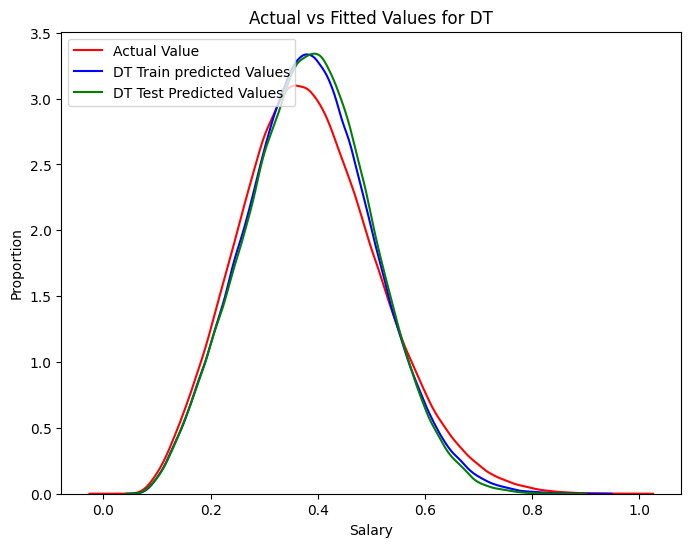

In [ ]:
# TEST!!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, median_absolute_error as MedAE, r2_score as r2_scr
from sklearn.model_selection import train_test_split

# Helper function for comparing models metrics
def models_performance(models, models_name, train_x, test_x, train_y, test_y):
    data = {'Metric': ['MSE', 'MAE', 'MedAE', 'RMSE', 'r2_scr']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    trained_models = {}

    for (m, model_name) in zip(models, models_name):
        if model_name == 'Polynomial LR':
            poly = PolynomialFeatures(degree=2).fit(train_x)
            model = m().fit(poly.transform(train_x), train_y)
            pred_train_y = model.predict(poly.transform(train_x))
            pred_test_y = model.predict(poly.transform(test_x))
        else:
            model = m.fit(train_x, train_y)
            pred_train_y = model.predict(train_x)
            pred_test_y = model.predict(test_x)

        trained_models[model_name] = model  # Saving trained model with its name


        # Storing results in list
        results = [MSE(pred_train_y,train_y),MSE(pred_test_y,test_y), MAE(pred_train_y,train_y),MAE(pred_test_y,test_y),
                   MedAE(pred_train_y,train_y),MedAE(pred_test_y,test_y),np.sqrt(MSE(pred_train_y,train_y)),
                   np.sqrt(MSE(pred_test_y,test_y)),r2_scr(pred_train_y,train_y),r2_scr(pred_test_y,test_y)]


        # Using indexing to grab train results only
        df_train[model_name] = [results[0], results[2], results[4], results[6], results[8]]

        # Using indexing to grab test results only
        df_test[model_name] = [results[1], results[3], results[5], results[7], results[9]]

        # Plot actual vs predicted distribution for train and test
        plt.figure(figsize=(8, 6))
        ax1 = sns.distplot(train_y, hist=False, color="r", label="Actual Value")
        sns.distplot(pred_train_y, hist=False, color="b", label=f"{model_name} Train predicted Values", ax=ax1)
        sns.distplot(pred_test_y, hist=False, color="g", label=f"{model_name} Test Predicted Values", ax=ax1)
        plt.title(f'Actual vs Fitted Values for {model_name}')
        plt.xlabel('Salary')
        plt.ylabel('Proportion')
        plt.legend(loc="upper left")
        plt.show()



    return df_train, df_test,trained_models

# List of models object and name
# models = [
#           DecisionTreeRegressor(min_weight_fraction_leaf= 0.01, min_samples_leaf= 3, max_features= None, max_depth= 17)]
#               # DecisionTreeRegressor(max_depth=20, min_samples_split=40, max_features=40, random_state=108,min_samples_leaf=8)]
# models = [
#           DecisionTreeRegressor(max_depth=20, min_samples_split=50, max_features=30, random_state=108,min_samples_leaf=6)]
models = [RandomForestRegressor()]

models_name = ['RF', ]
# rf_param_grid = {'n_estimators':[100,200,250,300,400,500],
#                  'max_depth':[10,20,40,50,80],
#                  'min_samples_split':[2,4,6],
#                  'min_samples_leaf':[2,3,4],
#                  'max_features':['auto','sqrt']
#                 }

# Assuming train_x, test_x, train_y, and test_y are already defined
# Use function for comparing models by passing list of models object, names, train and test data
train_model_perform, test_model_perform, trained_models = models_performance(models, models_name, train_x, test_x, train_y, test_y)



In [ ]:
train_model_perform

,Metric,DT
0,MSE,0.001159
1,MAE,0.026196
2,MedAE,0.021096
3,RMSE,0.034043
4,r2_scr,0.918291


In [ ]:
test_model_perform

,Metric,DT
0,MSE,0.004850
1,MAE,0.055458
2,MedAE,0.046639
3,RMSE,0.069645
4,r2_scr,0.642494


In [ ]:
trained_models

# Візуалізація метрик

In [ ]:
import matplotlib.pyplot as plt

# Значення для кожної моделі (перший рядок датафрейму)
dt_value = train_model_perform['DT'][0]
rf_value = train_model_perform['RF'][0]
lr_value = train_model_perform['LR'][0]
poly_lr_value = train_model_perform['Polynomial LR'][0]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('MSE (Train Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()



# 2

# Значення для кожної моделі (перший рядок датафрейму)
dt_value = test_model_perform['DT'][0]
rf_value = test_model_perform['RF'][0]
lr_value = test_model_perform['LR'][0]
poly_lr_value = test_model_perform['Polynomial LR'][0]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('MSE (Test Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Значення для першого рядка датафрейму для кожної метрики
mse_train_values = [train_model_perform[train_model_perform['Metric'] == 'MSE']['DT'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'MSE']['RF'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'MSE']['LR'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'MSE']['Polynomial LR'].iloc[0]]

mse_test_values = [test_model_perform[test_model_perform['Metric'] == 'MSE']['DT'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'MSE']['RF'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'MSE']['LR'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'MSE']['Polynomial LR'].iloc[0]]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Побудова гістограми
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(models))

# Додавання тренувальних та тестових значень поряд з кожною моделлю
plt.bar([i - bar_width/2 for i in index], mse_train_values, bar_width, color='b', alpha=0.5, label='Train')
plt.bar([i + bar_width/2 for i in index], mse_test_values, bar_width, color='r', alpha=0.5, label='Test')

plt.title('MSE Comparison for Train and Test Data')
plt.xlabel('Model')
plt.ylabel('MSE Value')
plt.xticks(index, [model + ' (Train/Test)' for model in models], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Значення для кожної моделі (перший рядок датафрейму)
dt_value = train_model_perform['DT'][1]
rf_value = train_model_perform['RF'][1]
lr_value = train_model_perform['LR'][1]
poly_lr_value = train_model_perform['Polynomial LR'][1]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('MAE (Train Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()



# Значення для кожної моделі (перший рядок датафрейму)
dt_value = test_model_perform['DT'][1]
rf_value = test_model_perform['RF'][1]
lr_value = test_model_perform['LR'][1]
poly_lr_value = test_model_perform['Polynomial LR'][1]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('MAE (Test Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Значення для першого рядка датафрейму для кожної метрики
mse_train_values = [train_model_perform[train_model_perform['Metric'] == 'MAE']['DT'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'MAE']['RF'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'MAE']['LR'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'MAE']['Polynomial LR'].iloc[0]]

mse_test_values = [test_model_perform[test_model_perform['Metric'] == 'MAE']['DT'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'MAE']['RF'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'MAE']['LR'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'MAE']['Polynomial LR'].iloc[0]]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Побудова гістограми
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(models))

# Додавання тренувальних та тестових значень поряд з кожною моделлю
plt.bar([i - bar_width/2 for i in index], mse_train_values, bar_width, color='b', alpha=0.5, label='Train')
plt.bar([i + bar_width/2 for i in index], mse_test_values, bar_width, color='r', alpha=0.5, label='Test')

plt.title('MAE Comparison for Train and Test Data')
plt.xlabel('Model')
plt.ylabel('MAE Value')
plt.xticks(index, [model + ' (Train/Test)' for model in models], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Значення для кожної моделі (перший рядок датафрейму)
dt_value = train_model_perform['DT'][2]
rf_value = train_model_perform['RF'][2]
lr_value = train_model_perform['LR'][2]
poly_lr_value = train_model_perform['Polynomial LR'][2]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('MedAE (Train Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()



# Значення для кожної моделі (перший рядок датафрейму)
dt_value = test_model_perform['DT'][2]
rf_value = test_model_perform['RF'][2]
lr_value = test_model_perform['LR'][2]
poly_lr_value = test_model_perform['Polynomial LR'][2]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('MedAE (Test Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Значення для першого рядка датафрейму для кожної метрики
mse_train_values = [train_model_perform[train_model_perform['Metric'] == 'MedAE']['DT'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'MedAE']['RF'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'MedAE']['LR'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'MedAE']['Polynomial LR'].iloc[0]]

mse_test_values = [test_model_perform[test_model_perform['Metric'] == 'MedAE']['DT'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'MedAE']['RF'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'MedAE']['LR'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'MedAE']['Polynomial LR'].iloc[0]]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Побудова гістограми
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(models))

# Додавання тренувальних та тестових значень поряд з кожною моделлю
plt.bar([i - bar_width/2 for i in index], mse_train_values, bar_width, color='b', alpha=0.5, label='Train')
plt.bar([i + bar_width/2 for i in index], mse_test_values, bar_width, color='r', alpha=0.5, label='Test')

plt.title('MedAE Comparison for Train and Test Data')
plt.xlabel('Model')
plt.ylabel('MedAE Value')
plt.xticks(index, [model + ' (Train/Test)' for model in models], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Значення для кожної моделі (перший рядок датафрейму)
dt_value = train_model_perform['DT'][3]
rf_value = train_model_perform['RF'][3]
lr_value = train_model_perform['LR'][3]
poly_lr_value = train_model_perform['Polynomial LR'][3]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('RMSE (Train Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()




# Значення для кожної моделі (перший рядок датафрейму)
dt_value = test_model_perform['DT'][3]
rf_value = test_model_perform['RF'][3]
lr_value = test_model_perform['LR'][3]
poly_lr_value = test_model_perform['Polynomial LR'][3]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('RMSE (Test Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Значення для першого рядка датафрейму для кожної метрики
mse_train_values = [train_model_perform[train_model_perform['Metric'] == 'RMSE']['DT'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'RMSE']['RF'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'RMSE']['LR'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'RMSE']['Polynomial LR'].iloc[0]]

mse_test_values = [test_model_perform[test_model_perform['Metric'] == 'RMSE']['DT'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'RMSE']['RF'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'RMSE']['LR'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'RMSE']['Polynomial LR'].iloc[0]]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Побудова гістограми
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(models))

# Додавання тренувальних та тестових значень поряд з кожною моделлю
plt.bar([i - bar_width/2 for i in index], mse_train_values, bar_width, color='b', alpha=0.5, label='Train')
plt.bar([i + bar_width/2 for i in index], mse_test_values, bar_width, color='r', alpha=0.5, label='Test')

plt.title('RMSE Comparison for Train and Test Data')
plt.xlabel('Model')
plt.ylabel('RMSE Value')
plt.xticks(index, [model + ' (Train/Test)' for model in models], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Значення для кожної моделі (перший рядок датафрейму)
dt_value = train_model_perform['DT'][4]
rf_value = train_model_perform['RF'][4]
lr_value = train_model_perform['LR'][4]
poly_lr_value = train_model_perform['Polynomial LR'][4]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('r2_scr (Train Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()



# Значення для кожної моделі (перший рядок датафрейму)
dt_value = test_model_perform['DT'][4]
rf_value = test_model_perform['RF'][4]
lr_value = test_model_perform['LR'][4]
poly_lr_value = test_model_perform['Polynomial LR'][4]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Значення моделей
values = [dt_value, rf_value, lr_value, poly_lr_value]

# Побудова стовбчастої діаграми
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'orange', 'red'])
plt.title('r2_scr (Test Data)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Значення для першого рядка датафрейму для кожної метрики
mse_train_values = [train_model_perform[train_model_perform['Metric'] == 'r2_scr']['DT'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'r2_scr']['RF'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'r2_scr']['LR'].iloc[0],
                    train_model_perform[train_model_perform['Metric'] == 'r2_scr']['Polynomial LR'].iloc[0]]

mse_test_values = [test_model_perform[test_model_perform['Metric'] == 'r2_scr']['DT'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'r2_scr']['RF'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'r2_scr']['LR'].iloc[0],
                   test_model_perform[test_model_perform['Metric'] == 'r2_scr']['Polynomial LR'].iloc[0]]

# Моделі
models = ['DT', 'RF', 'LR', 'Polynomial LR']

# Побудова гістограми
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(models))

# Додавання тренувальних та тестових значень поряд з кожною моделлю
plt.bar([i - bar_width/2 for i in index], mse_train_values, bar_width, color='b', alpha=0.5, label='Train')
plt.bar([i + bar_width/2 for i in index], mse_test_values, bar_width, color='r', alpha=0.5, label='Test')

plt.title('r2_scr Comparison for Train and Test Data')
plt.xlabel('Model')
plt.ylabel('r2_scr Value')
plt.xticks(index, [model + ' (Train/Test)' for model in models], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Створення стовбчастої діаграми для стовпця 'DT'
plt.figure(figsize=(12, 6))
sns.barplot(x=test_model_perform.index, y='DT', data=test_model_perform, palette="Greens")
plt.title('Performance of DT Model (Test Data)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


In [ ]:
#  Plotting the performance metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='value', hue='variable',
            data=pd.melt(train_model_perform, ['Metric']), palette="Blues")
plt.title('Performance Metrics Comparison (Train Data)')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='value', hue='variable',
            data=pd.melt(test_model_perform, ['Metric']), palette="Greens")
plt.title('Performance Metrics Comparison (Test Data)')
plt.ylabel('Value')
plt.show()

# RMSE of all model on train and test data

In [ ]:
# printing rmse comparision of model on train and test

train_model_perform.loc[4:]

In [ ]:
test_model_perform.loc[4:]

# Hyperparameter Tunning
* RamdomizedSearchCV
* Grid Search


# RamdomizedSearch CrossValidation

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def rs_cv(model,train_x,train_y,param):
    from sklearn.model_selection import RandomizedSearchCV
  # Random search of parameters, using 3 fold cross validation,
  # search across 100 different combinations, and use all available cores
    randomizer = RandomizedSearchCV(estimator=model,param_distributions=param,n_iter=100,cv=3,verbose=True,n_jobs=-1,random_state=108)
    randomizer.fit(train_x,train_y)
  # print best parameters
    print('Best Params:{}'.format(randomizer.best_params_))

In [ ]:
# create RandomForest parameters dict for tunning
rf_param_grid = {'n_estimators':[200,250,300],
                 'max_depth':[40,50,80],
                 'min_samples_split':[2,4],
                 'min_samples_leaf':[2,3],
                 'max_features':['auto','sqrt']
                }
# passing data for hyper parameter tunning with Randomized search cv
rs_cv(RandomForestRegressor(),train_x,train_y,param=rf_param_grid)

In [ ]:
# # create GradientBoostRegressor parameters dict for tunning
# gb_param_grid = {'eta':[0.01,0.015,0.025,0.05,0.1],
#                  'gamma':[0.05-0.1,0.3,0.5,0.7,0.9,1.0]
#                  'learning_rate':[0.0001,0.001,0.01,0.1,0.2],
#                  'alpha':[0,0.1,0.5,1.0],
#                  'subsample':[0.6,0.7,0.8,0.9,1.0],
#                  'max_depth':[3,5,7,9,12,15,17,25]
#                 }

# # passing data for hyper parameter tunning with Randomized search cv
# rs_cv(GradientBoostingRegressor(),train_x,train_y,param=gb_param_grid)

In [ ]:
# # create KNNRegressor parameters dict for tunning
# from sklearn.neighbors import KNeighborsRegressor
# knn_param_grid = {'n_neighbors':[2,4,8,16,32,40,50],
#                  'p':[1,2,3]}

# # passing data for hyper parameter tunning with Randomized search cv
# rs_cv(KNeighborsRegressor(),train_x,train_y,param=knn_param_grid)

In [ ]:
# create DecisionTreeRegressor parameters dict for tunning
dt_param_grid = {'spliter':['random','best'],
                'max_depth':[3,5,7,9,12,15,17],
                'min_samples_leaf':[2,3,4,6,8],
                'min_weight_fraction_leaf':[0.01,0.1,0.2,0.4,0.5],
                'max_features':[None,'auto','log2','sqrt']
                }
# passing data for hyper parameter tunning with Randomized search cv
rs_cv(DecisionTreeRegressor(),train_x,train_y,param=dt_param_grid)

In [ ]:
# # create AdaBoostRegressor parameters dict for tunning
# adb_param_grid = {'n_estimators':[10,30,40,50],
#                  'learning_rate':[0.001,0.005,0.01,0.1]}

# # passing data for hyper parameter tunning with Randomized search cv
# rs_cv(AdaBoostRegressor(),train_x,train_y,param=adb_param_grid)

In [ ]:
# # create XGBoostRegressor parameters dict for tunning
# xgb_param_grid = {'eta':[0.01,0.015,0.025,0.05,0.10],
#                  'gamma':[0.05-0.1,0.3,0.5,0.7,0.9,1.0]
#                  'learning_rate':[0.0001,0.001,0.01,0.1,0.2],
#                  'alpha':[0,0.1,0.5,1.0],
#                  'subsample':[0.6,0.7,0.8,0.9,1.0],
#                  'max_depth':[3,5,7,9,12,15,17,25],
#                  'colsample_bytree':[0.2,0.3,0.4]
#                 }

# # passing data for hyper parameter tunning with Randomized search cv
# rs_cv(XGBRegressor(),train_x,train_y,param=xgb_param_grid)

# GridSearch CrossValidation

In [ ]:
# Helper function to perform hyper parameter tunning with GridSearchCV
def grids(model,train_x,train_y,grid):
    from sklearn.model_selection import GridSearchCV
    # Grid search of parameters, using 5 fold cross validation
    g_randomizer = GridSearchCV(estimator=model,param_grid=grid,scoring='neg_mean_absolute_error',
                        cv=5,n_jobs=3,verbose=1,return_train_score=True)
    #fit model_cv
    g_randomizer.fit(train_x,train_y)
    # print best parameters
    print('Best Params: {}'.format(g_randomizer.best_params_))
    # print best score
    print('Best Score: {}'.format(g_randomizer.best_score_))

In [ ]:
# create parameters dict in list for tunning
rf_param_grid = {'n_estimators':[100,200,250,300,400,500],
                 'max_depth':[10,20,40,50,80],
                 'min_samples_split':[2,4,6],
                 'min_samples_leaf':[2,3,4],
                 'max_features':['auto','sqrt']
                }

# passing data for hyper parameter tunning with Gridsearchcv
grids(RandomForestRegressor(),train_x,train_y,grid=rf_param_grid)

In [ ]:
dt_param_grid = {
                'max_depth':[15,20,25],
                'min_samples_leaf':[6,8,10,12],
                # 'min_weight_fraction_leaf':[0.2,0.4,0.5],
                'min_samples_split':[2,10,20,40],
                'max_features':[None,'auto','log2','sqrt'],
                'random_state':[30,50,100]
                }
grids(DecisionTreeRegressor(),train_x,train_y,grid=dt_param_grid)
# DecisionTreeRegressor(max_depth=20, min_samples_split=40, max_features=40, random_state=108,min_samples_leaf=8)]

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


PicklingError: Could not pickle the task to send it to the workers.

### Now working with provided test dataset

# Working with data

In [ ]:
# test data
test_df.head()

In [ ]:
obj_df = test_df[['yearsExperience','milesFromMetropolis']]
obj_cols = obj_df.columns

In [ ]:
# passing test data for scaling, similarly as done for train data
def scaled(data,cols):
    data = data[cols]
    trans = MinMaxScaler()
    data = trans.fit_transform(data)
    scaled_data = pd.DataFrame(data)
    scaled_data.columns = ['yearsExperience','milesFromMetropolis']
    return scaled_data
# Making a list of the column names to be scaled
test_cols = [i for i in test_df.columns if test_df[i].dtypes != 'object']
# passing data and column name for scaling
test_scaled_data = scaled(obj_df,obj_cols)

In [ ]:
test_scaled_data.head()

In [ ]:
# passing test dataset for one hot encoding process
test_cat_cols = [i for i in test_df.columns if test_df.dtypes[i] == 'object']
cat_df = test_df[test_cat_cols]

encoder_1hot = OneHotEncoder()
encoded_features = encoder_1hot.fit_transform(cat_df)
tranformed_test_set = pd.concat([encoded_features,test_scaled_data],axis=1)
tranformed_test_set

In [ ]:
encoded_features.shape,tranformed_test_set[:50000].shape

In [ ]:
encoded_features.columns

In [ ]:
tranformed_test_set.columns

In [ ]:
test_x

# LINEAR REGRESSION results

In [ ]:
# LINEAR REGRESSION
# Instantiate the model
model_linear_reg = LinearRegression()
# Fit the model to the data
model_linear_reg.fit(train_x,train_y)
test_pred_y_linear = model_linear_reg.predict(test_x)

plt.figure(figsize=(8, 6))
ax1 = sns.distplot(test_y, hist=False, color="r", label="Actual Value")
sns.distplot(test_pred_y_linear, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Salary with Linear Regression')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

def rev_min_max_func(scaled_val):
    max_val = max(train_df1['salary'])
    min_val = min(train_df1['salary'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

def rev_min_max_func_age(scaled_val):
    max_val = max(train_df1['yearsExperience'])
    min_val = min(train_df1['yearsExperience'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
test_pred_y_actual = np.apply_along_axis(rev_min_max_func, 0, test_y)
# Зробіть копію test_x
test_x_copy = test_x.copy()

# Додайте до копії нові стовпці з 'Actual Value' і 'Fitted Values'
test_x_copy['Actual Value'] = np.apply_along_axis(rev_min_max_func, 0, test_y)
test_x_copy['Fitted Values'] = np.apply_along_axis(rev_min_max_func, 0, test_pred_y_linear)
test_x_copy['Error'] = abs(test_x_copy['Actual Value'] - test_x_copy['Fitted Values'])
test_x_copy['yearsExperience_real'] = np.apply_along_axis(rev_min_max_func_age, 0, test_x_copy['yearsExperience'])


import pandas as pd


test_x_copy['Age Group'] = pd.cut(test_x_copy['yearsExperience_real'], bins=6)

# Згрупуйте дані за проміжками віку та обчисліть середню похибку
grouped_errors = test_x_copy.groupby('Age Group')['Error'].mean()


grouped_errors.plot(kind='bar', figsize=(10, 6))
plt.title('Average Error by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.show()


jobtype_columns = test_x_copy.filter(like='jobType')

test_x_copy['jobType_encoded'] = jobtype_columns.idxmax(axis=1)

# Згрупувати дані за кодованим 'jobType' та обчислити середню похибку
grouped_errors_jobtype = test_x_copy.groupby('jobType_encoded')['Error'].mean()

# Побудувати стовбчикову діаграму
grouped_errors_jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Average Error by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.show()


# Згрупувати дані за кодованим 'jobType' та обчислити середнє значення зарплати
grouped_salary_by_jobtype = test_x_copy.groupby('jobType_encoded').agg({
    'Actual Value': 'mean',
    'Fitted Values': 'mean'
})


grouped_salary_by_jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

# Згрупуйте дані за проміжками віку та обчисліть середнє значення реальної та передбаченої зарплати
grouped_salary_by_age_actual = test_x_copy.groupby('Age Group')['Actual Value'].mean()
grouped_salary_by_age_predicted = test_x_copy.groupby('Age Group')['Fitted Values'].mean()

# Об'єднайте результати в один DataFrame
grouped_salary_comparison_age = pd.DataFrame({
    'Actual Value': grouped_salary_by_age_actual,
    'Fitted Values': grouped_salary_by_age_predicted
})

# Побудуйте стовбчикову діаграму
grouped_salary_comparison_age.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary Comparison by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()



In [ ]:
import pandas as pd

# Припустимо, що ви маєте DataFrame з назвою test_x_copy, який містить стовпці 'Actual Value', 'Fitted Values' і 'Error'

# Виведення даних у формі таблиці та сортування за стовпцем 'Error'
sorted_data = test_x_copy[['Actual Value', 'Fitted Values', 'Error']].sort_values(by='Error',ascending=True)

# Виведення відсортованих даних у формі таблиці
print(sorted_data.head(20))


In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title('Learning Curves')
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

model_linear_reg = LinearRegression()
model_linear_reg.fit(train_x,train_y)
plot_learning_curves(model_linear_reg, train_x,train_y, test_x, test_y)

In [ ]:
import matplotlib.pyplot as plt

# Отримання коефіцієнтів моделі
coefficients = model.coef_
columns_names = train_x.columns.tolist()

# Сортування коефіцієнтів за значенням
sorted_indices = sorted(range(len(coefficients)), key=lambda i: coefficients[i])
sorted_coefficients = [coefficients[i] for i in sorted_indices]
sorted_columns = [columns_names[i] for i in sorted_indices]

# Створення діаграми
plt.figure(figsize=(10, 6))
plt.barh(sorted_columns, sorted_coefficients)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Linear Regression Feature Importance')
plt.show()

# Виведення коефіцієнтів у вигляді таблиці
import pandas as pd
coefficients_df = pd.DataFrame({'Feature Name': sorted_columns, 'Coefficient': sorted_coefficients})
reversed_coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(reversed_coefficients_df)



# Поліноміальна результати

In [ ]:
# POLY REGRESSION
# Instantiate the model
# poly = PolynomialFeatures(degree=2)  # You can change the degree as per your requirement
# train_x_poly = poly.fit_transform(train_x)
# test_x_poly = poly.transform(test_x)

# # Instantiate the model
# model_poly_regr = LinearRegression()

# # Fit the model to the data
# model_poly_regr.fit(train_x_poly, train_y)
# test_pred_y_poly = model_poly_regr.predict(test_x)
poly = PolynomialFeatures(degree=2).fit(train_x)
model = LinearRegression().fit(poly.transform(train_x), train_y)
test_pred_y_poly = model.predict(poly.transform(test_x))

plt.figure(figsize=(8, 6))
ax1 = sns.distplot(test_y, hist=False, color="r", label="Actual Value")
sns.distplot(test_pred_y_poly, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Salary with Linear Regression')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

def rev_min_max_func(scaled_val):
    max_val = max(train_df1['salary'])
    min_val = min(train_df1['salary'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

def rev_min_max_func_age(scaled_val):
    max_val = max(train_df1['yearsExperience'])
    min_val = min(train_df1['yearsExperience'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
test_pred_y_actual = np.apply_along_axis(rev_min_max_func, 0, test_y)
# Зробіть копію test_x
test_x_copy = test_x.copy()

# Додайте до копії нові стовпці з 'Actual Value' і 'Fitted Values'
test_x_copy['Actual Value'] = np.apply_along_axis(rev_min_max_func, 0, test_y)
test_x_copy['Fitted Values'] = np.apply_along_axis(rev_min_max_func, 0, test_pred_y_poly)
test_x_copy['Error'] = abs(test_x_copy['Actual Value'] - test_x_copy['Fitted Values'])
test_x_copy['yearsExperience_real'] = np.apply_along_axis(rev_min_max_func_age, 0, test_x_copy['yearsExperience'])


import pandas as pd


test_x_copy['Age Group'] = pd.cut(test_x_copy['yearsExperience_real'], bins=6)

# Згрупуйте дані за проміжками віку та обчисліть середню похибку
grouped_errors = test_x_copy.groupby('Age Group')['Error'].mean()


grouped_errors.plot(kind='bar', figsize=(10, 6))
plt.title('Average Error by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.show()


jobtype_columns = test_x_copy.filter(like='jobType')

test_x_copy['jobType_encoded'] = jobtype_columns.idxmax(axis=1)

# Згрупувати дані за кодованим 'jobType' та обчислити середню похибку
grouped_errors_jobtype = test_x_copy.groupby('jobType_encoded')['Error'].mean()

# Побудувати стовбчикову діаграму
grouped_errors_jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Average Error by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.show()


# Згрупувати дані за кодованим 'jobType' та обчислити середнє значення зарплати
grouped_salary_by_jobtype = test_x_copy.groupby('jobType_encoded').agg({
    'Actual Value': 'mean',
    'Fitted Values': 'mean'
})


grouped_salary_by_jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

# Згрупуйте дані за проміжками віку та обчисліть середнє значення реальної та передбаченої зарплати
grouped_salary_by_age_actual = test_x_copy.groupby('Age Group')['Actual Value'].mean()
grouped_salary_by_age_predicted = test_x_copy.groupby('Age Group')['Fitted Values'].mean()

# Об'єднайте результати в один DataFrame
grouped_salary_comparison_age = pd.DataFrame({
    'Actual Value': grouped_salary_by_age_actual,
    'Fitted Values': grouped_salary_by_age_predicted
})

# Побудуйте стовбчикову діаграму
grouped_salary_comparison_age.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary Comparison by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()
import pandas as pd

# Припустимо, що ви маєте DataFrame з назвою test_x_copy, який містить стовпці 'Actual Value', 'Fitted Values' і 'Error'

# Виведення даних у формі таблиці та сортування за стовпцем 'Error'
sorted_data = test_x_copy[['Actual Value', 'Fitted Values', 'Error']].sort_values(by='Error',ascending=True)

# Виведення відсортованих даних у формі таблиці
print(sorted_data.head(20))



In [ ]:
import matplotlib.pyplot as plt

# Отримання коефіцієнтів моделі
poly = PolynomialFeatures(degree=2).fit(train_x)
model = LinearRegression().fit(poly.transform(train_x), train_y)
coefficients = model.coef_
columns_names = train_x.columns.tolist()

# Сортування коефіцієнтів за значенням
sorted_indices = sorted(range(len(coefficients)), key=lambda i: coefficients[i])
sorted_coefficients = [coefficients[i] for i in sorted_indices]
sorted_columns = [columns_names[i] for i in sorted_indices]

# Створення діаграми
plt.figure(figsize=(10, 6))
plt.barh(sorted_columns, sorted_coefficients)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Linear Regression Feature Importance')
plt.show()

# Виведення коефіцієнтів у вигляді таблиці
import pandas as pd
coefficients_df = pd.DataFrame({'Feature Name': sorted_columns, 'Coefficient': sorted_coefficients})
reversed_coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(reversed_coefficients_df)



# Дерево рішень результати

In [ ]:
#DecisionTreeRegressor

model_decision_tree = DecisionTreeRegressor(  max_depth=25, min_samples_split=60, max_features=30, random_state=108)
# Fit the model to the data
model_decision_tree.fit(train_x,train_y)


test_pred_y_dt = model_decision_tree.predict(test_x)

plt.figure(figsize=(8, 6))
ax1 = sns.distplot(test_y, hist=False, color="r", label="Actual Value")
sns.distplot(test_pred_y_dt, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Salary with Linear Regression')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

def rev_min_max_func(scaled_val):
    max_val = max(train_df1['salary'])
    min_val = min(train_df1['salary'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

def rev_min_max_func_age(scaled_val):
    max_val = max(train_df1['yearsExperience'])
    min_val = min(train_df1['yearsExperience'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
test_pred_y_actual = np.apply_along_axis(rev_min_max_func, 0, test_y)
# Зробіть копію test_x
test_x_copy = test_x.copy()

# Додайте до копії нові стовпці з 'Actual Value' і 'Fitted Values'
test_x_copy['Actual Value'] = np.apply_along_axis(rev_min_max_func, 0, test_y)
test_x_copy['Fitted Values'] = np.apply_along_axis(rev_min_max_func, 0, test_pred_y_dt)
test_x_copy['Error'] = abs(test_x_copy['Actual Value'] - test_x_copy['Fitted Values'])
test_x_copy['yearsExperience_real'] = np.apply_along_axis(rev_min_max_func_age, 0, test_x_copy['yearsExperience'])


import pandas as pd


test_x_copy['Age Group'] = pd.cut(test_x_copy['yearsExperience_real'], bins=6)

# Згрупуйте дані за проміжками віку та обчисліть середню похибку
grouped_errors = test_x_copy.groupby('Age Group')['Error'].mean()


grouped_errors.plot(kind='bar', figsize=(10, 6))
plt.title('Average Error by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.show()


jobtype_columns = test_x_copy.filter(like='jobType')

test_x_copy['jobType_encoded'] = jobtype_columns.idxmax(axis=1)

# Згрупувати дані за кодованим 'jobType' та обчислити середню похибку
grouped_errors_jobtype = test_x_copy.groupby('jobType_encoded')['Error'].mean()

# Побудувати стовбчикову діаграму
grouped_errors_jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Average Error by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.show()


# Згрупувати дані за кодованим 'jobType' та обчислити середнє значення зарплати
grouped_salary_by_jobtype = test_x_copy.groupby('jobType_encoded').agg({
    'Actual Value': 'mean',
    'Fitted Values': 'mean'
})


grouped_salary_by_jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

# Згрупуйте дані за проміжками віку та обчисліть середнє значення реальної та передбаченої зарплати
grouped_salary_by_age_actual = test_x_copy.groupby('Age Group')['Actual Value'].mean()
grouped_salary_by_age_predicted = test_x_copy.groupby('Age Group')['Fitted Values'].mean()

# Об'єднайте результати в один DataFrame
grouped_salary_comparison_age = pd.DataFrame({
    'Actual Value': grouped_salary_by_age_actual,
    'Fitted Values': grouped_salary_by_age_predicted
})

# Побудуйте стовбчикову діаграму
grouped_salary_comparison_age.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary Comparison by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()
import pandas as pd

# Припустимо, що ви маєте DataFrame з назвою test_x_copy, який містить стовпці 'Actual Value', 'Fitted Values' і 'Error'

# Виведення даних у формі таблиці та сортування за стовпцем 'Error'
sorted_data = test_x_copy[['Actual Value', 'Fitted Values', 'Error']].sort_values(by='Error',ascending=True)

# Виведення відсортованих даних у формі таблиці
print(sorted_data.head(20))



In [ ]:
# Extracting feature importance from the Random Forest model
feature_importances = model_decision_tree.feature_importances_

# Creating a DataFrame to hold features and their importance scores
feature_importance_df = pd.DataFrame({'Feature': test_x.columns, 'Importance': feature_importances})

# Sorting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the top 10 most important features
top_features = feature_importance_df

# Plotting the top 10 features
plt.figure(figsize=(12, 7))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')

plt.title(' Important Features for DT')
plt.show()

top_features

# Рандом форест

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# define number of processes to run in parallel
num_procs = 2

# shared model parameters
verbose_lvl = 0

# Instantiate the model
model_random_forest = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60,  max_features=30, verbose=verbose_lvl)

# Fit the model to the data
model_random_forest.fit(train_x,train_y)



test_pred_y_rf = model_random_forest.predict(test_x)

plt.figure(figsize=(8, 6))
ax1 = sns.distplot(test_y, hist=False, color="r", label="Actual Value")
sns.distplot(test_pred_y_rf, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Salary with Linear Regression')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

def rev_min_max_func(scaled_val):
    max_val = max(train_df1['salary'])
    min_val = min(train_df1['salary'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

def rev_min_max_func_age(scaled_val):
    max_val = max(train_df1['yearsExperience'])
    min_val = min(train_df1['yearsExperience'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
test_pred_y_actual = np.apply_along_axis(rev_min_max_func, 0, test_y)
# Зробіть копію test_x
test_x_copy = test_x.copy()

# Додайте до копії нові стовпці з 'Actual Value' і 'Fitted Values'
test_x_copy['Actual Value'] = np.apply_along_axis(rev_min_max_func, 0, test_y)
test_x_copy['Fitted Values'] = np.apply_along_axis(rev_min_max_func, 0, test_pred_y_rf)
test_x_copy['Error'] = abs(test_x_copy['Actual Value'] - test_x_copy['Fitted Values'])
test_x_copy['yearsExperience_real'] = np.apply_along_axis(rev_min_max_func_age, 0, test_x_copy['yearsExperience'])


import pandas as pd


test_x_copy['Age Group'] = pd.cut(test_x_copy['yearsExperience_real'], bins=6)

# Згрупуйте дані за проміжками віку та обчисліть середню похибку
grouped_errors = test_x_copy.groupby('Age Group')['Error'].mean()


grouped_errors.plot(kind='bar', figsize=(10, 6))
plt.title('Average Error by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.show()


jobtype_columns = test_x_copy.filter(like='jobType')

test_x_copy['jobType_encoded'] = jobtype_columns.idxmax(axis=1)

# Згрупувати дані за кодованим 'jobType' та обчислити середню похибку
grouped_errors_jobtype = test_x_copy.groupby('jobType_encoded')['Error'].mean()

# Побудувати стовбчикову діаграму
grouped_errors_jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Average Error by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.show()


# Згрупувати дані за кодованим 'jobType' та обчислити середнє значення зарплати
grouped_salary_by_jobtype = test_x_copy.groupby('jobType_encoded').agg({
    'Actual Value': 'mean',
    'Fitted Values': 'mean'
})


grouped_salary_by_jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

# Згрупуйте дані за проміжками віку та обчисліть середнє значення реальної та передбаченої зарплати
grouped_salary_by_age_actual = test_x_copy.groupby('Age Group')['Actual Value'].mean()
grouped_salary_by_age_predicted = test_x_copy.groupby('Age Group')['Fitted Values'].mean()

# Об'єднайте результати в один DataFrame
grouped_salary_comparison_age = pd.DataFrame({
    'Actual Value': grouped_salary_by_age_actual,
    'Fitted Values': grouped_salary_by_age_predicted
})

# Побудуйте стовбчикову діаграму
grouped_salary_comparison_age.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary Comparison by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()
import pandas as pd

# Припустимо, що ви маєте DataFrame з назвою test_x_copy, який містить стовпці 'Actual Value', 'Fitted Values' і 'Error'

# Виведення даних у формі таблиці та сортування за стовпцем 'Error'
sorted_data = test_x_copy[['Actual Value', 'Fitted Values', 'Error']].sort_values(by='Error',ascending=True)

# Виведення відсортованих даних у формі таблиці
print(sorted_data.head(20))



In [ ]:
# Extracting feature importance from the Random Forest model
feature_importances = model_random_forest.feature_importances_

# Creating a DataFrame to hold features and their importance scores
feature_importance_fr = pd.DataFrame({'Feature': test_x.columns, 'Importance': feature_importances})

# Sorting the features by importance
feature_importance_fr = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the top 10 most important features
top_features = feature_importance_fr

# Plotting the top 10 features
plt.figure(figsize=(12, 7))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')

plt.title(' Important Features for RF')
plt.show()

top_features